In [1]:
import numpy as np

# 加载数据
black_data = np.load('plot2_noisy_20/black_region_noisy.npy')  # 黑色区域
red_data = np.load('plot2_noisy_20/red_region_noisy.npy')      # 红色区域

# 提取坐标
black_x = black_data[0, :]
black_y = black_data[1, :]
red_x = red_data[0, :]
red_y = red_data[1, :]

# 创建特征数组 (x, y) 和标签数组 target
black_features = np.column_stack((black_x, black_y))  # 黑色特征
red_features = np.column_stack((red_x, red_y))       # 红色特征

black_target = np.zeros((black_features.shape[0],), dtype=int)  # 黑色标签：0
red_target = np.ones((red_features.shape[0],), dtype=int)       # 红色标签：1

# 合并特征和标签
features = np.vstack((black_features, red_features))  # 合并所有特征
targets = np.hstack((black_target, red_target))       # 合并所有标签

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features = features[indices]  # 按打乱后的索引重排特征
targets = targets[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('plot2_noisy_20/features.npy', features)  # 保存打乱的特征数组
np.save('plot2_noisy_20/targets.npy', targets)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets.shape)   # (11000,)
print("前5个特征：\n", features[:5])
print("前5个标签：", targets[:5])


打乱后的特征数组形状： (5500, 2)
打乱后的标签数组形状： (5500,)
前5个特征：
 [[ 0.4165876  -0.84145999]
 [-0.41073603 -0.84508461]
 [-0.30409518  0.5306957 ]
 [-0.74136806  0.61488058]
 [ 0.45080649  0.32197263]]
前5个标签： [0 0 1 0 0]


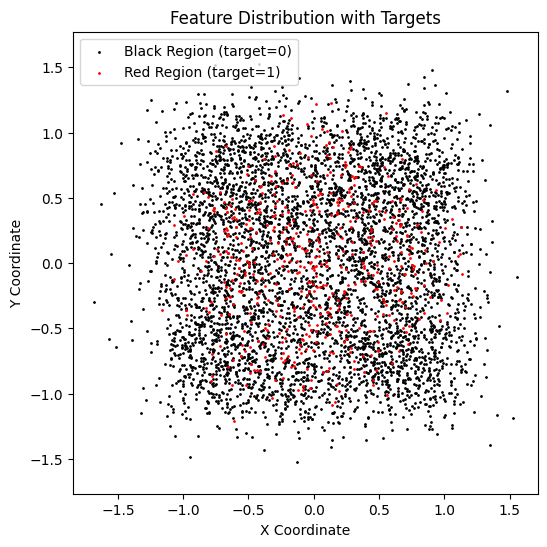

In [2]:
from imbens.metrics import *
from sklearn.metrics import *
from imbens.ensemble import *
from UADF import UncertaintyAwareDeepForest
from demo import get_config
import numpy as np
import matplotlib.pyplot as plt


X = np.load('plot2_noisy_20/features.npy')
y = np.load('plot2_noisy_20/targets.npy')

# 绘制分布图，使用布尔索引直接分类
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='black', s=1, label='Black Region (target=0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=1, label='Red Region (target=1)')
plt.title("Feature Distribution with Targets")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.axis("equal")  # 保持坐标比例一致
plt.show()



Begin to train.... - 2024-12-14 15:47:28,337 - DualGranularBalancedDeepForest
the shape of training samples: (5500, 2) - 2024-12-14 15:47:28,338 - DualGranularBalancedDeepForest
use gmean as training evaluation - 2024-12-14 15:47:28,338 - DualGranularBalancedDeepForest
stacking: False, save model: False - 2024-12-14 15:47:28,338 - DualGranularBalancedDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2024-12-14 15:47:28,339 - DualGranularBalancedDeepForest
The shape of x_train is (5500, 2) - 2024-12-14 15:47:28,339 - DualGranularBalancedDeepForest


Training UncertaintyAwareDeepForest...


layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_0,Accuracy=0.6273, f1_score=0.4969, auc=0.6775, gmean=0.6374, sen=0.6500, spe=0.6250, aupr=0.1434 - 2024-12-14 15:47:35,337 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_1,Accuracy=0.5791, f1_score=0.4574, auc=0.6365, gmean=0.5795, sen=0.5800, spe=0.5790, aupr=0.1270 - 2024-12-14 15:47:35,342 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_2,Accuracy=0.6045, f1_score=0.4695, auc=0.6219, gmean=0.5792, sen=0.5500, spe=0.6100, aupr=0.1330 - 2024-12-14 15:47:35,346 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_3,Accuracy=0.6482, f1_score=0.5013, auc=0.6781, gmean=0.6164, sen=0.5800, spe=0.6550, aupr=0.1462 - 2024-12-14 15:47:35,353 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_4,Accuracy=0.6036, f1_score=0.4715, auc=0.6342, gmean=0.5882, sen=0.5700, spe=0.6070, aupr=0.1321 - 2024-12-14 15:47:35,358 - KFoldWrapper
layer_0, estimator_0

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 0
num_layers: 1


layer_1, estimator_0, BalancedEnsembleClassifier, n_fold_0,Accuracy=0.8191, f1_score=0.5839, auc=0.6881, gmean=0.5654, sen=0.3700, spe=0.8640, aupr=0.2550 - 2024-12-14 15:48:01,820 - KFoldWrapper
layer_1, estimator_0, BalancedEnsembleClassifier, n_fold_1,Accuracy=0.7909, f1_score=0.5236, auc=0.6335, gmean=0.4414, sen=0.2300, spe=0.8470, aupr=0.1892 - 2024-12-14 15:48:01,824 - KFoldWrapper
layer_1, estimator_0, BalancedEnsembleClassifier, n_fold_2,Accuracy=0.8200, f1_score=0.5682, auc=0.6517, gmean=0.5196, sen=0.3100, spe=0.8710, aupr=0.2376 - 2024-12-14 15:48:01,828 - KFoldWrapper
layer_1, estimator_0, BalancedEnsembleClassifier, n_fold_3,Accuracy=0.8236, f1_score=0.5623, auc=0.6310, gmean=0.4958, sen=0.2800, spe=0.8780, aupr=0.2399 - 2024-12-14 15:48:01,832 - KFoldWrapper
layer_1, estimator_0, BalancedEnsembleClassifier, n_fold_4,Accuracy=0.8091, f1_score=0.5480, auc=0.6812, gmean=0.4827, sen=0.2700, spe=0.8630, aupr=0.2033 - 2024-12-14 15:48:01,838 - KFoldWrapper
layer_1, estimator_0

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 1
num_layers: 2
last_layer_index 0
last_layer_index 0
UncertaintyAwareDeepForest - Accuracy: 0.6985
UncertaintyAwareDeepForest - AUC: 0.9973
UncertaintyAwareDeepForest - Sensitivity: 1.0000
UncertaintyAwareDeepForest - Specificity: 0.6684
UncertaintyAwareDeepForest - G-Mean: 0.8176
UncertaintyAwareDeepForest - F1 Macro: 0.5887


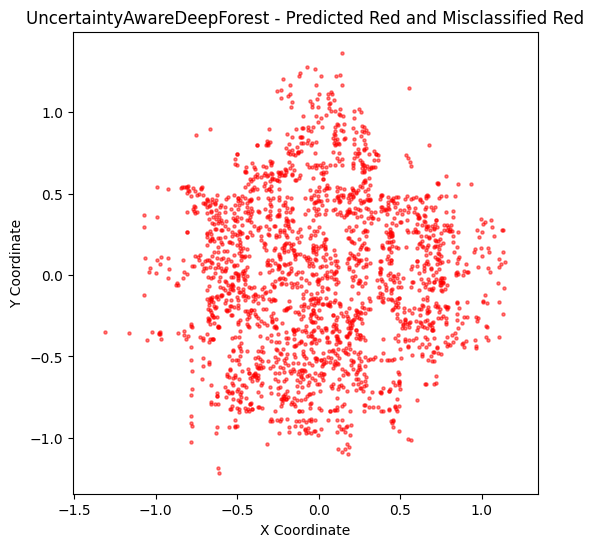

In [3]:
import os
# 配置输出文件夹
output_dir = "plot2_noisy_20"
os.makedirs(output_dir, exist_ok=True)

for method_name, model in {'UncertaintyAwareDeepForest': UncertaintyAwareDeepForest(get_config())}.items():
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)
    acc = accuracy_score(y, y_pred)
    auc = roc_auc_score(y, y_pred_proba[:, 1])
    sen = recall_score(y, y_pred)
    spe = specificity_score(y, y_pred)
    gmean = geometric_mean_score(y, y_pred)
    f1_macro = f1_score(y, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X[(y == 1) & (y_pred == 0)]

    # 绘制结果
    plt.figure(figsize=(6, 6))
    plt.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    plt.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    plt.title(f"{method_name} - Predicted Red and Misclassified Red")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.axis("equal")  # 保持坐标轴比例一致
    plt.show()


Training BalanceCascade...
BalanceCascade - Accuracy: 0.9002
BalanceCascade - AUC: 0.9975
BalanceCascade - Sensitivity: 1.0000
BalanceCascade - Specificity: 0.8902
BalanceCascade - G-Mean: 0.9435
BalanceCascade - F1 Macro: 0.7937
Training SelfPacedEnsemble...
Majority class detected: 0
SelfPacedEnsemble - Accuracy: 0.8147
SelfPacedEnsemble - AUC: 0.9954
SelfPacedEnsemble - Sensitivity: 1.0000
SelfPacedEnsemble - Specificity: 0.7962
SelfPacedEnsemble - G-Mean: 0.8923
SelfPacedEnsemble - F1 Macro: 0.6909
Training UnderBagging...
UnderBagging - Accuracy: 0.7971
UnderBagging - AUC: 0.9811
UnderBagging - Sensitivity: 1.0000
UnderBagging - Specificity: 0.7768
UnderBagging - G-Mean: 0.8814
UnderBagging - F1 Macro: 0.6735
Training EasyEnsemble...
EasyEnsemble - Accuracy: 0.6298
EasyEnsemble - AUC: 0.7212
EasyEnsemble - Sensitivity: 0.7260
EasyEnsemble - Specificity: 0.6202
EasyEnsemble - G-Mean: 0.6710
EasyEnsemble - F1 Macro: 0.5079
Training RUSBoost...
RUSBoost - Accuracy: 0.8147
RUSBoost - 

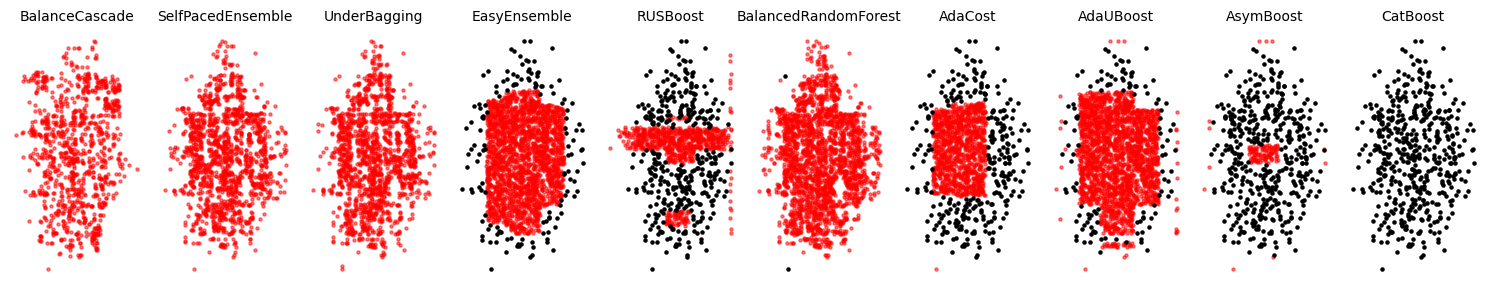

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import os
from catboost import CatBoostClassifier

# 配置输出文件夹
output_dir = "plot2_noisy_20"
os.makedirs(output_dir, exist_ok=True)

# 配置不平衡数据处理模型
ensemble_methods = {
    'BalanceCascade': BalanceCascadeClassifier(n_estimators=50),  # 设置生成50棵树
    'SelfPacedEnsemble': SelfPacedEnsembleClassifier(n_estimators=50),
    'UnderBagging': UnderBaggingClassifier(n_estimators=50),
    'EasyEnsemble': EasyEnsembleClassifier(n_estimators=50),
    'RUSBoost': RUSBoostClassifier(n_estimators=50),
    'BalancedRandomForest': BalancedRandomForestClassifier(n_estimators=50),
    'AdaCost': AdaCostClassifier(n_estimators=50),
    'AdaUBoost': AdaUBoostClassifier(n_estimators=50),
    'AsymBoost': AsymBoostClassifier(n_estimators=50),
    'CatBoost': CatBoostClassifier(n_estimators=50, verbose=0),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)
    acc = accuracy_score(y, y_pred)
    auc = roc_auc_score(y, y_pred_proba[:, 1])
    sen = recall_score(y, y_pred)
    spe = specificity_score(y, y_pred)
    gmean = geometric_mean_score(y, y_pred)
    f1_macro = f1_score(y, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")

    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X[(y == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

    # 保存图像
    plt.savefig(os.path.join(output_dir, f"{method_name}_prediction.png"), dpi=300, bbox_inches='tight')

# 统一调整布局
plt.tight_layout()
plt.show()


Training OverBagging...
OverBagging - Accuracy: 0.9985
OverBagging - AUC: 1.0000
OverBagging - Sensitivity: 0.9840
OverBagging - Specificity: 1.0000
OverBagging - G-Mean: 0.9920
OverBagging - F1 Macro: 0.9956
Training SMOTEBoost...
SMOTEBoost - Accuracy: 0.6442
SMOTEBoost - AUC: 0.7301
SMOTEBoost - Sensitivity: 0.7120
SMOTEBoost - Specificity: 0.6374
SMOTEBoost - G-Mean: 0.6737
SMOTEBoost - F1 Macro: 0.5159
Training OverBoost...
OverBoost - Accuracy: 0.6316
OverBoost - AUC: 0.7444
OverBoost - Sensitivity: 0.7660
OverBoost - Specificity: 0.6182
OverBoost - G-Mean: 0.6881
OverBoost - F1 Macro: 0.5138
Training KmeansSMOTEBoost...
KmeansSMOTEBoost - Accuracy: 0.7035
KmeansSMOTEBoost - AUC: 0.7111
KmeansSMOTEBoost - Sensitivity: 0.5520
KmeansSMOTEBoost - Specificity: 0.7186
KmeansSMOTEBoost - G-Mean: 0.6298
KmeansSMOTEBoost - F1 Macro: 0.5339
Training SMOTEBagging...
SMOTEBagging - Accuracy: 0.9985
SMOTEBagging - AUC: 1.0000
SMOTEBagging - Sensitivity: 0.9840
SMOTEBagging - Specificity: 1.0

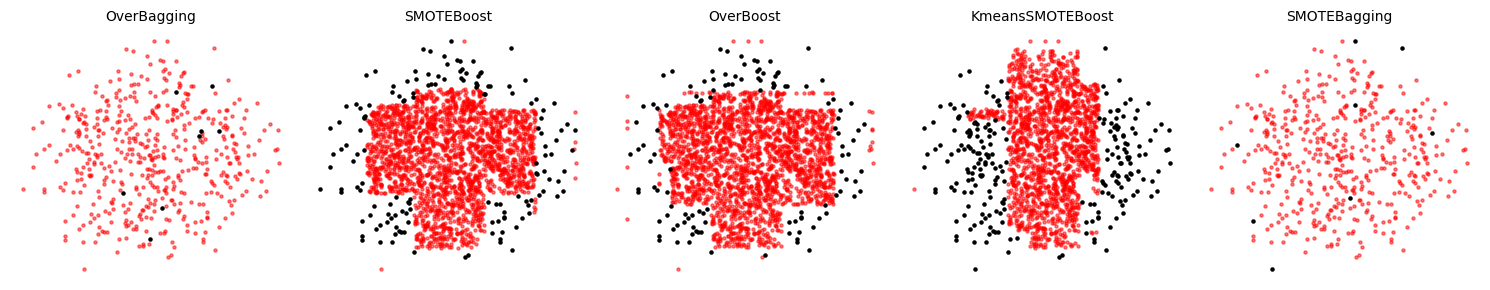

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os

# 配置输出文件夹
output_dir = "plot2_noisy_20"
os.makedirs(output_dir, exist_ok=True)
# 配置不平衡数据处理模型
ensemble_methods = {
    'OverBagging': OverBaggingClassifier(n_estimators=50),
    'SMOTEBoost': SMOTEBoostClassifier(n_estimators=50),
    'OverBoost': OverBoostClassifier(n_estimators=50),
    'KmeansSMOTEBoost': KmeansSMOTEBoostClassifier(n_estimators=50),
    'SMOTEBagging': SMOTEBaggingClassifier(n_estimators=50),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)
    acc = accuracy_score(y, y_pred)
    auc = roc_auc_score(y, y_pred_proba[:, 1])
    sen = recall_score(y, y_pred)
    spe = specificity_score(y, y_pred)
    gmean = geometric_mean_score(y, y_pred)
    f1_macro = f1_score(y, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)
    
    # 找到预测为红色的点
    predicted_red = X[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X[(y == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5, label="Misclassified")  # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

# 统一调整布局
plt.tight_layout()
plt.show()
